# Variational Monte Carlo (VMC)

## Mathematical Foundation of VMC

### Recap: Need for Variational Monte Carlo (VMC)
The Hartree-Fock energy can be expressed as:
$$
E_{\text{HF}} = T + V_{\text{ne}} + J - K
$$

Hartree-Fock theory does not account for **electron correlation effects**. These include:
1. **Dynamic Correlation**  
- Represents the correlation between the instantaneous motions of electrons.  
- **Coulomb repulsion** causes electrons to avoid each other more than Hartree-Fock predicts.  
- Important in accurately describing electronic motion, especially for systems with strong electron repulsion.

2. **Static Correlation**  
- Occurs when multiple electronic configurations (Slater determinants) have similar energies.  
- Significant in situations like bond breaking, where a single determinant is insufficient to describe the system.

The total energy can be expressed as:
$$
E_{\text{total}} = E_{\text{HF}} + E_{\text{corr}}
$$

According to the **variational principle**, the Hartree-Fock energy is always an upper bound to the true ground state energy:
$$
E_{\text{HF}} > E_{\text{total}}
$$

### 1. Expectation Value of Energy
In quantum mechanics, the expectation value of energy is given by:  
$$
E = \frac{\int \Psi \hat{H} \Psi \, d\tau}{\int \Psi \Psi \, d\tau}
$$  
where $\Psi$ is the trial wavefunction, and $\hat{H}$ is the Hamiltonian operator.  

### 2. Defining Local Energy
Let the **local energy** $E_L$ be defined as:  
$$
E_L = \frac{\hat{H} \Psi}{\Psi}
$$  
This reformulates the energy expectation value as:  
$$
E = \frac{\int |\Psi|^2 E_L \, d\tau}{\int |\Psi|^2 \, d\tau}
$$  

### 3. Probability Density and Monte Carlo Sampling
Using the probability density $P(\mathbf{R}) = \frac{|\Psi|^2}{\int |\Psi|^2 \, d\tau}$, the energy can be rewritten as:  
$$
E = \int P(\mathbf{R}) E_L(\mathbf{R}) \, d\mathbf{R}
$$  
This integral can be approximated by Monte Carlo sampling:  
$$
E \approx \frac{1}{N} \sum_{i=1}^N E_L(\mathbf{R}_i)
$$  
where $\mathbf{R}_i$ are electronic configurations sampled according to $P(\mathbf{R})$.  


## 4. Energy Variance
The central idea of VMC is to iteratively adjust the parameters of the trial wavefunction to minimize the energy $E$, thereby approximating the ground-state energy.

The energy variance is defined as:

$$ \sigma_E^2 = \langle(H-E)^2\rangle = \langle H^2\rangle - \langle H\rangle^2 $$
where the energy expectation value is:

$$ E = \langle H \rangle = \frac{\int \Psi^* H \Psi d\tau}{\int |\Psi|^2 d\tau} $$

We can expand the variance expression:
$$ \langle(H-E)^2\rangle = \frac{\int \Psi^*(H-E)^2\Psi d\tau}{\int |\Psi|^2 d\tau} = \frac{\int |\Psi|^2(E_L-E)^2 d\tau}{\int |\Psi|^2 d\tau} $$
where:

$E_L = \frac{H\Psi}{\Psi}$ is the local energy
$E$ is the total energy expectation value

Therefore, the energy variance is:
$$ \sigma_E^2 = \frac{\int |\Psi|^2(E_L-E)^2 d\tau}{\int |\Psi|^2 d\tau} $$


$$ E = \frac{\int \Psi^* H \Psi d\tau}{\int |\Psi|^2 d\tau} $$



## 5. Energy Gradient

Let:
- \($f(\alpha) = \int \Psi^* \hat{H} \Psi \, d\tau)$
- \($g(\alpha) = \int \Psi^* \Psi \, d\tau )$

$$
E = \frac{f(\alpha)}{g(\alpha)}
$$




The derivative of a quotient \( \frac{f(x)}{g(x)} \) is given by:
$$
\frac{d}{dx} \left( \frac{f(x)}{g(x)} \right) = \frac{f'(x)g(x) - f(x)g'(x)}{[g(x)]^2}
$$


$$
\frac{\partial E}{\partial \alpha} = \frac{\left(\int \frac{\partial}{\partial \alpha} (\Psi^* \hat{H} \Psi) \, d\tau \right) g - f \left(\int \frac{\partial}{\partial \alpha} (\Psi^* \Psi) \, d\tau \right)}{g^2}
$$

Since \( E = \frac{f}{g} \), we can rewrite the equation as:
$$
\frac{\partial E}{\partial \alpha} = \frac{\int \frac{\partial}{\partial \alpha} (\Psi^* \hat{H} \Psi) \, d\tau}{\int \Psi^* \Psi \, d\tau} - E \cdot \frac{\int \frac{\partial}{\partial \alpha} (\Psi^* \Psi) \, d\tau}{\int \Psi^* \Psi \, d\tau}
$$

## 6. Jastrow Method: Enhancing Electron Correlation

The Jastrow factor $( J(\{r_i\}) )$ is defined as:

$$
J(\{r_i\}) = \sum_{i<j} u(|r_i - r_j|) + \sum_i \chi(r_i)
$$

- **$u(|r_i - r_j|)$**: Represents electron-electron correlations.  
  - It captures the Coulomb repulsion between electrons when they are close to each other.

- **$\chi(r_i)$**: Represents electron-nucleus correlations.  
  - It adjusts the probability of an electron being near a nucleus.
 
The Slater-Jastrow (SJ) wavefunction incorporates the Jastrow factor as follows:

$$
\Psi_{\text{SJ}} = e^{J(\{r_i\})} \times \text{det}[\phi_i^k(r_j)]
$$

- $e^{J(\{r_i\})}$: Jastrow correction factor.  
- $\text{det}[\phi_i^k(r_j)]$: Slater determinant ensuring antisymmetry.
- The value is scalar not vector and matrix
  
## 7. Optimization

- Cost Function:
$$ C(\alpha) = E + \omega\sigma^2_E $$

**1.Steepest descent:**
$$ \alpha_{new} = \alpha_{old} - \gamma \frac{\partial C}{\partial \alpha} $$

**2. Stochastic Reconfiguration (SR) Parameter Update**

The SR method solves the following linear equation:

$$
\mathbf{S} \cdot \delta \mathbf{p} = -\tau \mathbf{g}
$$

Where:
- $\mathbf{S}$: Overlap matrix
- $\delta \mathbf{p}$: Parameter update vector
- $\tau$: Learning rate
- $\mathbf{g}$: Energy gradient vector

$$
S_{ij} = \langle \Psi_j \Psi_i \rangle - \langle \Psi_j \rangle \langle \Psi_i \rangle
$$

$$
\Psi_i = \frac{1}{\Psi} \frac{\partial \Psi}{\partial p_i}
$$

$$
g_i = 2 \, \text{Re} \left[ \langle E_{\text{loc}} \Psi_i \rangle - \langle E_{\text{loc}} \rangle \langle \Psi_i \rangle \right]
$$

$$
E_{\text{loc}} = \frac{H \Psi}{\Psi}
$$

Solve the linear equation:
   $$
   \mathbf{S} \cdot \delta \mathbf{p} = -\tau \mathbf{g}
   $$
   to obtain the parameter update $\delta \mathbf{p}$.

Update Parameters
   Use the update vector $\delta \mathbf{p}$ to modify the parameters:
   $$
   \mathbf{p}_{\text{new}} = \mathbf{p} + \delta \mathbf{p}
   $$

**3. Linear Method:**
$$ \mathbf{H}\Delta\mathbf{p} = \mathbf{S}\Delta\mathbf{p}E $$



In [80]:
import pyscf
import numpy as np
import pyscf.mcscf
import matplotlib.pyplot as plt 
from pyscf.pbc import gto, scf

In [82]:
xmin = -2
xmax = 2
ymin = -3
ymax = 6

def run_scan(mol, wf):
    nconf=10
    xval = 2.0
    coords = pyq.initial_guess(mol, nconf)
    data, coords = pyq.vmc(wf, coords, nblocks=1)
    coords.configs[:,1,0]=xval
    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X,Y = np.meshgrid(x,y)
    wfval = np.zeros((nconf,np.prod(X.shape)))
    wf.recompute(coords)
    baseval = wf.value()
    print(baseval)

    for i, (x,y) in enumerate(zip(X.flatten(), Y.flatten())):
        epos = coords.electron(0)
        epos.configs[:,:] = np.array([xval,x,y])[np.newaxis,:]
        testval, tmp = wf.testvalue(0,epos)
        wfval[:,i] = testval*baseval[0]*np.exp(baseval[1])

    return coords, wfval, X, Y


def make_plot(coords, wfval, X, Y, outfile=None):
    cs=list(range(4))
    fig, axes = plt.subplots(1, len(cs), figsize=(len(cs)*4,8), sharey=True)
    maval = np.max(wfval)
    for c, ax in zip(cs, axes):
        cmap = ax.imshow(np.abs(wfval[c].reshape(X.shape))**2, origin = 'lower', extent=(xmin,xmax,ymin,ymax), cmap='Blues')
        for xy in coords.configs[c,1:]:
            ax.plot(xy[1],xy[2],marker='o', color='r', mew=1, mec='k', markersize=5)
        for atompos in mol.atom_coords():
            ax.plot(atompos[1],atompos[2],marker='o', color='w', mew=1, mec='k', markersize=20)
        ax.set_title(str(c))
        #plt.colorbar(cmap)
    if outfile  is not None:
        plt.savefig(outfile, dpi=200)

In [84]:
mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    ecp="ccecp",
    basis="ccecpccpvdz",
    unit="bohr",
    verbose=5,
)

System: uname_result(system='Darwin', node='wirelessprv-10-193-215-78.near.illinois.edu', release='23.4.0', version='Darwin Kernel Version 23.4.0: Wed Feb 21 21:44:54 PST 2024; root:xnu-10063.101.15~2/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.9.20 (main, Oct  3 2024, 02:24:59) 
[Clang 14.0.6 ]
numpy 2.0.2  scipy 1.13.1  h5py 3.12.1
Date: Mon Jan 13 00:07:03 2025
PySCF version 2.7.0
PySCF path  /opt/anaconda3/envs/jaejun2/lib/python3.9/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 2
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = bohr
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr   0.0
[INPUT]  2

In [86]:
mf = pyscf.scf.RHF(mol)
mf.kernel()



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/zt/6988qd4n6bbdm0fk9bg1qnb40000gn/T/tmp6ubi7x4h
max_memory 4000 MB (current use 0 MB)
cond(S) = 67.45169312325919
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
E1 = -1.9471474368657127  E_coul = 0.697632282245987
init E= -0.749515154619726
    CPU time for initialize scf      0.03 sec, wall time      0.02 sec
  HOMO = -0.426068316512957  LUMO = 0.0849316875203978
  mo_energy =
[-0.42606832  0.08493169  0.70047972  0.84460627  1.31883732  1.31883732
  1.65015221  1.85964567  1.85964567  2.67875606]
E1 = -2.14309477639173  E_coul = 0.5532133356021933
cycle= 1 E= -1.08988144078954  delta_E= -0.34  |g|= 0.043  |d

np.float64(-1.0905378313306195)

In [100]:
coords = pyq.initial_guess(mol, 10)
data, coords = pyq.vmc(wf, coords, nblocks=1)
coords

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([-5.78195833, -5.70242614, -4.04453083, -6.35303069, -6.09568972,
       -5.29086881, -6.2923725 , -4.379775  , -5.28682666, -5.73383651]))


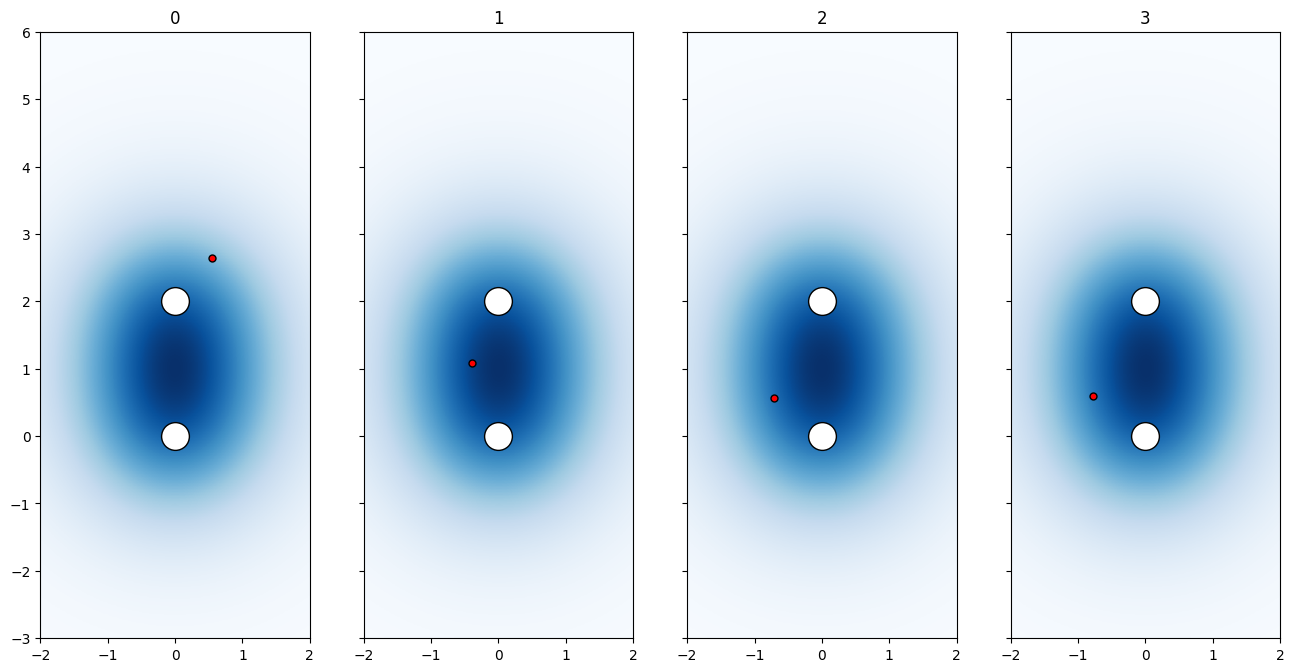

In [88]:
wf, _ = pyq.generate_wf(mol, mf)
coords, wfval, X, Y = run_scan(mol, wf)
make_plot(coords, wfval, X, Y)

### RHF (Restricted Hartree-Fock) Method
In RHF, the wavefunction is based on a single Slater determinant. For a two-electron system, the wavefunction is expressed as:

$$
\
\Psi(r_1, r_2) = \frac{1}{\sqrt{2}} \left| \begin{array}{cc}
\phi_1(r_1) \alpha(1) & \phi_1(r_1) \beta(1) \\
\phi_1(r_2) \alpha(2) & \phi_1(r_2) \beta(2) \\
\end{array} \right|
$$

Here, $\phi_1$  is the spatial orbital function, and $\alpha$ and $\beta$ represent the spin up and spin down of the electrons, respectively. This method implies that all electrons share the same spatial orbital function, and their interactions are only indirectly considered through the average field approximation.

### Correlation-enhanced Wavefunction
The correlation-enhanced wavefunction models direct interactions between electrons through a combination of different orbital functions. For a two-electron system, it can be expressed as:

$$
\
\Psi(r_1, r_2) \simeq a_1 \phi_1(r_1) \phi_1(r_2) + a_2 (\phi_1(r_1) \phi_2(r_2) + \phi_1(r_2) \phi_2(r_1)) + a_3 \phi_2(r_1) \phi_2(r_2)
\
$$

In this model, $\phi_1$ and $\phi_2$ are different spatial orbital functions, and \(a_1\), \(a_2\), and \(a_3\) are coefficients that weigh each term. This wavefunction allows for electrons to be in different orbitals, providing a more accurate representation of electron interactions.

In [109]:
mc = pyscf.mcscf.CASSCF(mf, 2, 2)
mc.kernel()


******** <class 'pyscf.mcscf.mc1step.CASSCF'> ********
CAS (1e+1e, 2o), ncore = 0, nvir = 8
max_cycle_macro = 50
max_cycle_micro = 4
conv_tol = 1e-07
conv_tol_grad = None
orbital rotation max_stepsize = 0.02
orbital rotation threshold for CI restart = 0.01
augmented hessian ah_max_cycle = 30
augmented hessian ah_conv_tol = 1e-12
augmented hessian ah_linear dependence = 1e-14
augmented hessian ah_level shift = 1e-08
augmented hessian ah_start_tol = 2.5
augmented hessian ah_start_cycle = 3
augmented hessian ah_grad_trust_region = 3
kf_trust_region = 3
kf_interval = 4
ci_response_space = 4
ci_grad_trust_region = 3
with_dep4 0
natorb = False
canonicalization = True
sorting_mo_energy = False
ao2mo_level = 2
chkfile = /var/folders/zt/6988qd4n6bbdm0fk9bg1qnb40000gn/T/tmp6ubi7x4h
max_memory 4000 MB (current use 0 MB)
internal_rotation = False
******** <class 'pyscf.fci.direct_spin1.FCISolver'> ********
max. cycles = 50
conv_tol = 1e-08
davidson only = False
linear dependence = 1e-12
level shi

(np.float64(-1.119888314492808),
 np.float64(-1.619888314492808),
 FCIvector([[-9.84457810e-01, -7.10575275e-13],
            [-7.10577562e-13,  1.75621239e-01]]),
 array([[ 6.64764002e-01, -1.27678385e+00, -1.56424826e+00,
         -1.40125358e+00, -6.11351959e-14,  6.85837188e-14,
          8.12189709e-01, -3.35493761e-16, -5.25230364e-15,
          1.09907552e+00],
        [-1.08088005e-01,  2.91720359e-01,  1.62467993e+00,
          2.57328094e+00,  5.30321685e-14, -5.81637987e-14,
         -6.80302780e-01,  1.00353496e-15,  2.04244752e-15,
         -1.84641597e-01],
        [-1.22201606e-15,  6.61544581e-15,  5.69794618e-16,
          3.06533448e-15,  3.65414947e-01,  5.23249677e-01,
          1.76089427e-16,  7.74400570e-01, -2.18145507e-01,
         -1.98711918e-17],
        [ 4.48824350e-15, -3.07168698e-14, -9.17457990e-16,
         -1.57885152e-14,  5.23249677e-01, -3.65414947e-01,
         -1.50899394e-15,  2.18145507e-01,  7.74400570e-01,
         -3.51824407e-15],
        

In [125]:
print(mc.e_tot)
print(mf.e_tot)

-1.119888314492808
-1.0905378313306195


(array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([-5.46218031, -4.96135933, -4.78604727, -3.95137459, -4.83647962,
       -5.07423823, -5.25083954, -4.71439084, -3.84116118, -4.43517625]))


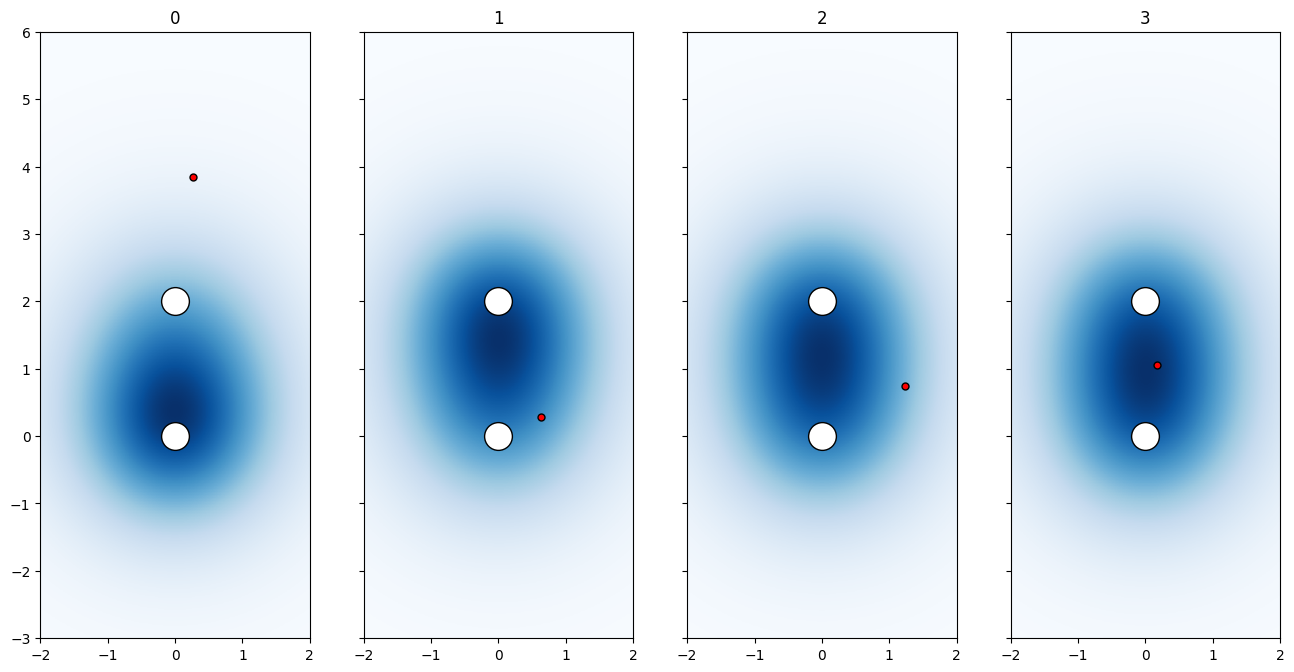

In [127]:
wf, _ = pyq.generate_slater(mol, mf, mc=mc)
coords, wfval, X, Y = run_scan(mol, wf)
make_plot(coords, wfval, X, Y)

## Slater-Jastrow

$$
\Psi_{CI} e^U,
$$
where $U$ depends explicitly on electron-electron distances

In [111]:
wf, to_opt = pyq.generate_wf(mol, mf, mc=mc)
grad =pyq.gradient_generator(mol, wf, to_opt)
coords = pyq.initial_guess(mol, 5000) #5000 poss posi
wf, data = pyq.line_minimization(wf, coords, grad, verbose=True, max_iterations=10)

starting warmup
finished warmup
----------vmc done
descent en -1.1230346111946659 0.0002670403515238096  estimated sigma  0.1888260434129252
descent |grad| 0.054188546532653446
----------vmc done
descent en -1.1258658950025238 0.0005439716761068949  estimated sigma  0.38464606094859766
descent |grad| 0.03714472100776559
----------vmc done
descent en -1.1278738436030766 0.00029805766069756465  estimated sigma  0.2107585930638471
descent |grad| 0.026359374097524594
----------vmc done
descent en -1.129085513126315 0.00029689696567105386  estimated sigma  0.2099378577397118
descent |grad| 0.019634238290141368
----------vmc done
descent en -1.128811502186801 0.0003713841252735316  estimated sigma  0.26260823340594847
descent |grad| 0.015653849171870016
----------vmc done
descent en -1.1296866149958213 0.00023178166018240467  estimated sigma  0.16389438366965434
descent |grad| 0.012340477969045197
----------vmc done
descent en -1.1297144158665469 0.00013837800596629583  estimated sigma  0.09

In [136]:
to_opt

{'wf1det_coeff': array([False, False, False, False]),
 'wf2acoeff': array([[[ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True]],
 
        [[ True,  True],
         [ True,  True],
         [ True,  True],
         [ True,  True]]]),
 'wf2bcoeff': array([[False, False, False],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])}

final energy -1.1298596318288132 +/- 0.0002432379494129566


Text(0, 0.5, 'Energy (Ha)')

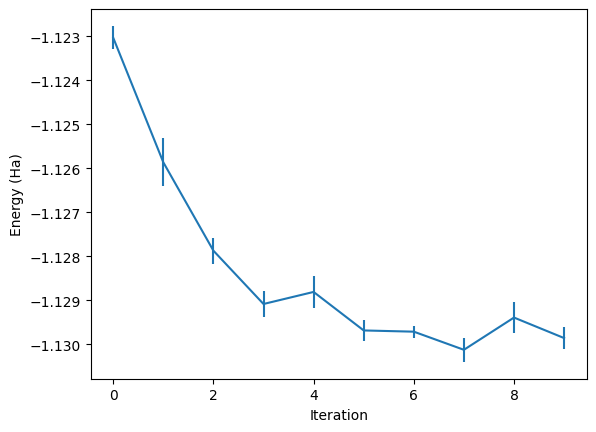

In [134]:
en = [d['energy'] for d in data]
errorbars = [d['energy_error'] for d in data]
iteration = [d['iteration'] for d in data]
print("final energy", en[-1], "+/-", errorbars[-1])
plt.errorbar(iteration, en, errorbars)
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")

(array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([-4.8752041 , -6.53869581, -4.87020949, -6.35093053, -5.04361566,
       -5.37621652, -5.17098311, -4.34586569, -6.24335172, -5.58281939]))


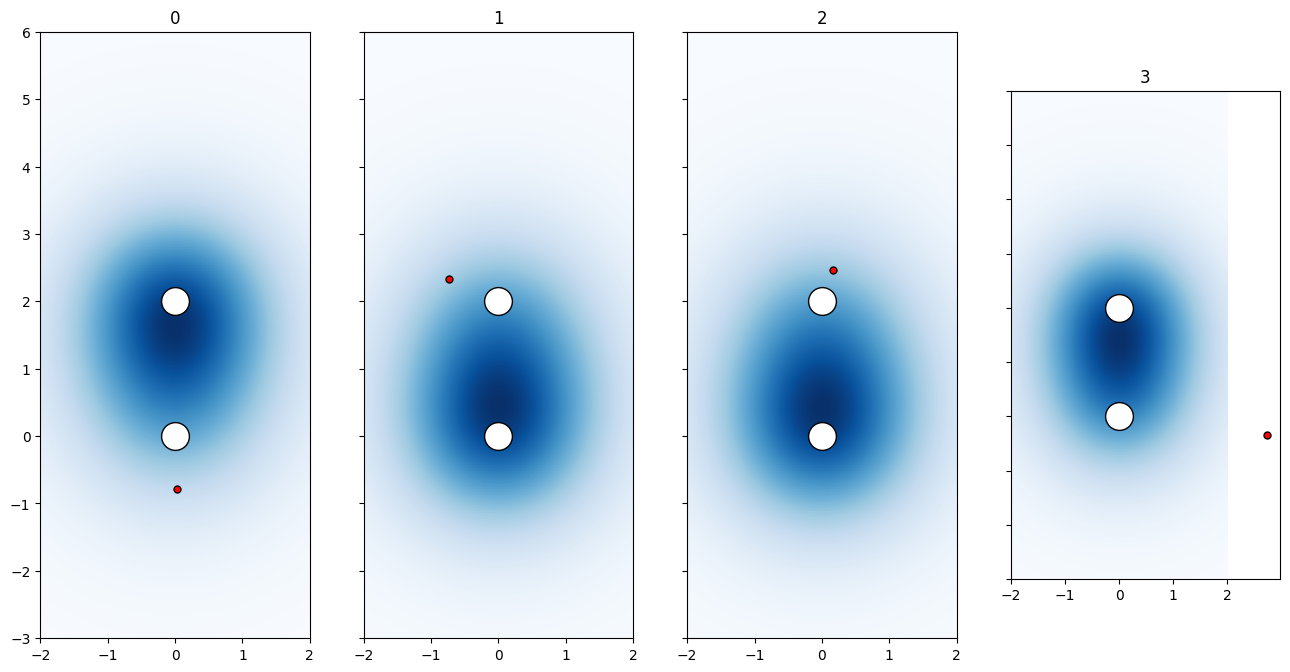

In [142]:
coords, wfval, X, Y = run_scan(mol, wf)
make_plot(coords, wfval, X, Y)

In [144]:
dmc_data, coords, weights = pyq.rundmc(wf, coords, tstep=0.1, accumulators={'energy':pyq.EnergyAccumulator(mol)})

In [146]:
blocks = pyq.avg_reblock(dmc_data['energytotal'], nblocks=10)
print("Exact result: ", np.mean(blocks), "+/-", np.std(blocks)/np.sqrt(len(blocks)))

Exact result:  -1.1432061361680812 +/- 0.004027934454552791


# Questions

1. Upcoming conference?

2. Our goal --> Ferminet? Pauilnet?
-->  Crystal --> equivariant/ bloch therome?
or molecules
or ghf?

3. MOFs